# Import and define directories

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pickle
import glob
import gzip
import pandas as pd

In [3]:
year = 2019

# for running this locally, need to update directories to the appropriate places where the data is stored!

if year==2018:
    import definitions_2018 as bd
    resultsdir = 'data2018/'
    comb_contents_dir = 'comb-contents2018/' 
    zfilln = 2 # for file names
elif year==2019:
    import definitions_2019 as bd
    resultsdir = 'data2019/'
    comb_contents_dir = 'comb-contents2019/'
    zfilln = 3 # for file names    
    
import displayfunctions as bp  # 'bee plots'
import datafunctions as dfunc
dfunc.init(bd) 
bp.init(bd)
bd.year

/home/jdavidson/bees_sharedcodes/Bees_sharedcodes/JD-2018-Github/definitions_2018.py:20: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  cohort_birthdates = np.array([pd.Timestamp(np.array(cohort_data['DOB'][cohort_data['cohort']==c])[0],freq='D') for c in cohort_colornames])


2018

# (A) Import the per-day data matrix

In [3]:
dfday = pd.read_csv(resultsdir+'daydatamat.csv')

In [4]:
dfday.columns

Index(['Unnamed: 0', 'Age', 'Day number', 'Bee unique ID', 'Cohort ID',
       'Honey', 'Brood care', 'Pollen', 'Dance floor', 'Other', 'Frame 0',
       'Frame 1', 'Frame 2', 'Frame 3', 'Frame 4', 'Frame 5', 'Median speed',
       'Speed IQR', 'Speed 90th quantile', 'Dispersion (avg)',
       'Exit distance (median)', 'Fraction squares visited', 'Festoon',
       'Empty comb', 'Num. observations', 'Num. outside trips',
       'Num. dance floor visits', 'Frame 0 - Num. crossings',
       'Frame 1 - Num. crossings', 'Frame 2 - Num. crossings',
       'Frame 3 - Num. crossings', 'Frame 4 - Num. crossings',
       'Frame 5 - Num. crossings', 'Dispersion-minute avg.',
       'Speed circadian coeff.', 'Time outside day5min',
       'Num. outside trips day5min', 'Time outside day1min',
       'Num. outside trips day1min'],
      dtype='object')

In [5]:
dfday

,Unnamed: 0,Age,Day number,Bee unique ID,Cohort ID,Honey,Brood care,Pollen,Dance floor,Other,...,Frame 2 - Num. crossings,Frame 3 - Num. crossings,Frame 4 - Num. crossings,Frame 5 - Num. crossings,Dispersion-minute avg.,Speed circadian coeff.,Time outside day5min,Num. outside trips day5min,Time outside day1min,Num. outside trips day1min
0,0,20.0,0.0,402.0,3.0,0.098687,0.001876,0.000000,0.000000,0.899437,...,0.0,0.0,0.0,0.0,3.323640,NaN,0.000000,0.0,0.000000,0.0
1,1,14.0,0.0,642.0,4.0,0.000000,0.000000,0.391858,0.374046,0.234097,...,0.0,0.0,0.0,0.0,9.381625,-0.328618,0.125000,1.0,0.125000,1.0
2,2,14.0,0.0,653.0,4.0,0.006475,0.000000,0.000000,0.000000,0.993525,...,0.0,1.0,0.0,0.0,21.528202,0.130526,0.000000,0.0,0.000000,0.0
3,3,14.0,0.0,666.0,4.0,0.117647,0.000000,0.000000,0.000000,0.882353,...,0.0,0.0,3.0,2.0,11.476420,-0.001212,0.000000,0.0,0.000000,0.0
4,4,14.0,0.0,676.0,4.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,7.656773,-0.608761,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77392,77392,41.0,85.0,5291.0,16.0,0.000964,0.007133,0.004402,0.612550,0.374952,...,0.0,0.0,26.0,26.0,63.435752,0.355890,0.565972,7.0,0.604861,12.0
77393,77393,41.0,85.0,5295.0,16.0,0.003347,0.000389,0.002154,0.836110,0.158000,...,0.0,0.0,21.0,19.0,44.327308,0.455806,0.201389,6.0,0.299306,6.0
77394,77394,41.0,85.0,5333.0,16.0,0.046307,0.022890,0.007171,0.809443,0.114188,...,0.0,13.0,40.0,31.0,78.255430,0.640936,0.392361,3.0,0.403472,6.0
77395,77395,41.0,85.0,5337.0,16.0,0.012230,0.064127,0.013107,0.729809,0.180727,...,0.0,1.0,86.0,81.0,113.005136,0.704426,0.270833,0.0,0.284028,7.0


# (B) Import data matrix for hour, 5min, or 1min divisions
* Full dataset for 2018 with different time divisions are files 'df_dayhour_alldays.zip', 'df_day5min_alldays.zip', 'df_day1min_alldays.zip' at: https://doi.org/10.5281/zenodo.6045860
* Full dataset for 2019 with different time divisions are files 'df_dayhour.zip', 'df_day5min.zip', 'df_day1min.zip' at: https://doi.org/10.5281/zenodo.7298798

In [6]:
numtimedivs=24 # 24->1 hour, 288->5 min, 1440->1 min
daystoload = np.arange(10,15)

if numtimedivs==24:
    prefix = 'dayhour'
elif numtimedivs==288:
    prefix = 'day5min'
elif numtimedivs==1440: 
    prefix = 'day1min'
else: 
    print('ERROR:  use either numtimesteps == 24 or 288 or 1440')

for i,daynum in enumerate(daystoload):
    filename = resultsdir+'df_'+prefix+'_'+str(daynum).zfill(zfilln)+'.hdf'
    if i==0:
        df = pd.read_hdf(filename)
    else:
        df = pd.concat((df,pd.read_hdf(filename) ))

In [7]:
df.columns

Index(['Age', 'Num. observations', 'Honey', 'Brood care', 'Pollen',
       'Dance floor', 'Other', 'Frame 0', 'Frame 1', 'Frame 2', 'Frame 3',
       'Frame 4', 'Frame 5', 'Median speed', 'Speed IQR',
       'Speed 90th quantile', 'Dispersion (avg)', 'Exit distance (median)',
       'Fraction squares visited', 'Day number', 'Festoon', 'Empty comb',
       'blank1', 'blank2', 'Bee unique ID', 'Cohort ID', 'Num. outside trips',
       'Num. dance floor visits', 'Dispersion-minute avg.',
       'Frame 0 - Num. crossings', 'Frame 1 - Num. crossings',
       'Frame 2 - Num. crossings', 'Frame 3 - Num. crossings',
       'Frame 4 - Num. crossings', 'Frame 5 - Num. crossings', 'Hour'],
      dtype='object')

In [8]:
df

,Age,Num. observations,Honey,Brood care,Pollen,Dance floor,Other,Frame 0,Frame 1,Frame 2,...,Num. outside trips,Num. dance floor visits,Dispersion-minute avg.,Frame 0 - Num. crossings,Frame 1 - Num. crossings,Frame 2 - Num. crossings,Frame 3 - Num. crossings,Frame 4 - Num. crossings,Frame 5 - Num. crossings,Hour
0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12883,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,23.0
12884,4.0,573.0,0.949389,0.00000,0.000000,0.0,0.050611,1.0,0.000000,0.0,...,0.0,0.0,46.356664,0.0,0.0,0.0,0.0,0.0,0.0,23.0
12885,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,23.0
12886,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,23.0


# (C) XY histogram data - per hour
* Full histogram data calculated for 2018 is file 'dfxy_dayhour_alldays.zip' at: https://doi.org/10.5281/zenodo.6045860
* Full histogram data calculated for 2019 is file 'dfxy_dayhour.zip' at: https://doi.org/10.5281/zenodo.7298798

In [17]:
daystoload = np.arange(10,12)

numtimedivs=24  # histograms are only saved per-hour
prefix = 'dayhour'


for i,daynum in enumerate(daystoload):
    filename = resultsdir+'dfxy_'+prefix+'_'+str(daynum).zfill(zfilln)+'.hdf'
    if i==0:
        dfxy = pd.read_hdf(filename)
    else:
        dfxy = pd.concat((dfxy,pd.read_hdf(filename)))

In [18]:
dfxy.columns

Index(['Day number', 'Hour', 'Cohort ID', 'Bee unique ID', 'hist0', 'hist1',
       'hist2', 'hist3', 'hist4', 'hist5',
       ...
       'hist1425', 'hist1426', 'hist1427', 'hist1428', 'hist1429', 'hist1430',
       'hist1431', 'hist1432', 'hist1433', 'hist1434'],
      dtype='object', length=1439)

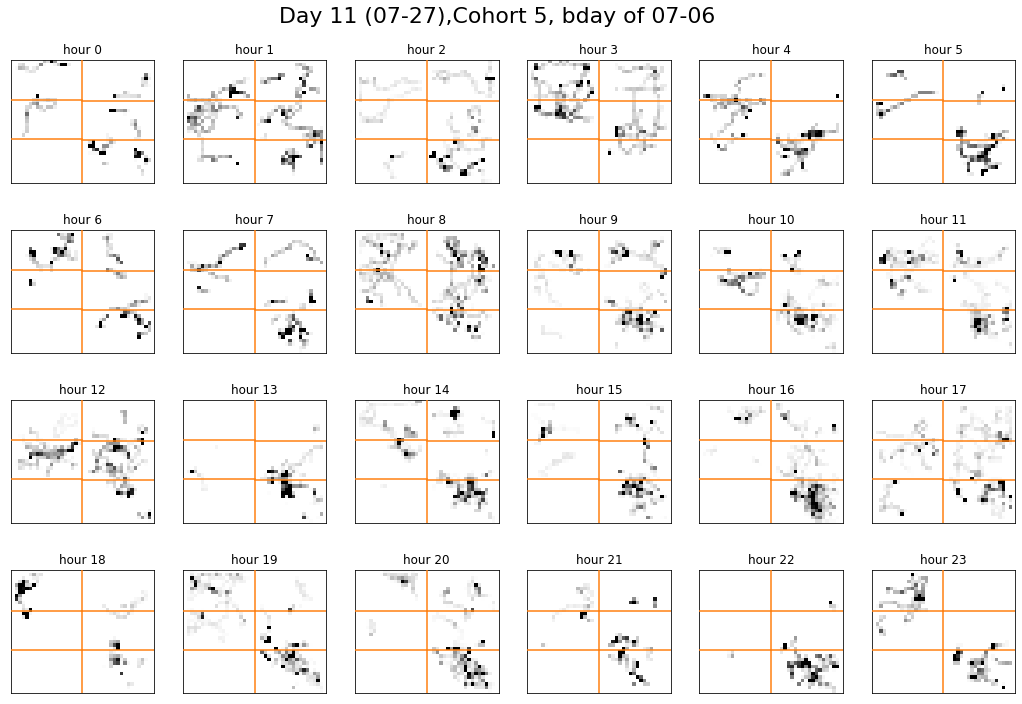

In [19]:
# Plot an example:  bees of a certain cohort, mean xy histograms for every hour of a certain day
daynum = daystoload[1]
cohortnum=5
sel = (dfxy['Day number']==daynum) & (dfxy['Cohort ID']==cohortnum) 

numrows = 4
numcols = np.ceil(24/numrows).astype(int)
f,ax = plt.subplots(numrows,numcols,sharex=True,sharey=True)
f.set_size_inches(numcols*3,numrows*3)
for hournum in range(24):
    d,m = np.divmod(hournum,numcols)
    a=ax[d,m]
    cohorthourhist = dfunc.flat_to_hist(np.mean(dfxy[sel & (dfxy['Hour']==hournum)],axis=0))
    bp.showframe(a)
    bp.showhist(cohorthourhist,ax=a)
    a.set_title('hour '+str(hournum))
plt.suptitle('Day '+str(daynum)+' ('+bp.showmonthday(bd.alldaytimestamps[daynum])+'),' +  'Cohort '+str(cohortnum)+', bday of '+bp.showmonthday(bd.cohort_birthdates[cohortnum]),fontsize=22,y=0.93)
plt.show()

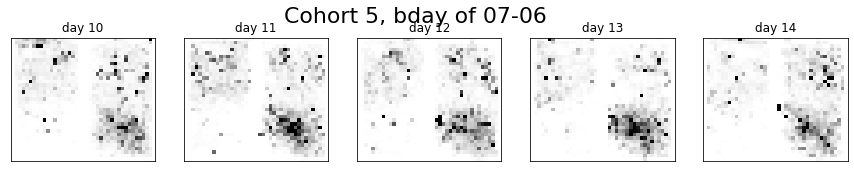

In [12]:
# Plot an example:  bees of a certain cohort, for each day loaded
cohortnum=5

sel = (dfxy['Cohort ID']==cohortnum)

numrows = 1
numcols = np.ceil(len(daystoload)/numrows).astype(int)
f,ax = plt.subplots(numrows,numcols,sharex=True,sharey=True)
f.set_size_inches(numcols*3,numrows*3)
for i,daynum in enumerate(daystoload):
    if numrows>1:
        d,m = np.divmod(i,numcols) 
        a=ax[d,m]
    else:
        a=ax[i]
    dayhist = dfunc.flat_to_hist(np.mean(dfxy[sel & (dfxy['Day number']==daynum)],axis=0))
    bp.showhist(dayhist,ax=a)
    a.set_title('day '+str(daynum))
plt.suptitle('Cohort '+str(cohortnum)+', bday of '+bp.showmonthday(bd.cohort_birthdates[cohortnum]),fontsize=22,y=0.93)
plt.show()

# (D) XY trajectory data (detailed tracking data)
* For 2018 data, zip files containing trajectories are 'beetrajectories_days_000_to_049.zip' and 'beetrajectories_days_050_to_085.zip'.  Full pkl and image files for comb contents is 'comb-contents2018.zip'.  Both available at https://doi.org/10.5281/zenodo.6045860
* For 2019 data, zip files containing trajectories are 'trajectories_000-019.zip', 'trajectories_020-039.zip', 'trajectories_040-059.zip', 'trajectories_060-079.zip', 'trajectories_080-099.zip', and 'trajectories_100-114.zip' .  Full pkl and image files for comb contents is 'comb-contents-images2019.zip'.  Both available at https://doi.org/10.5281/zenodo.7298798

Trajectory Dataframe columns are:
* **daynum**:  the day number of the observation period. The year-month-day date for a certain daynum is stored at: bd.alldaytimestamps[daynum]  
* **framenum**: using the camera frame rate of 3fps, the frame number for that particular day. For a Timestamp data type, can calculate with dfunc.assign_integer_framenums(timestamp), or with hour/minute/seconds, calculate with dfunc.assign_integer_framenums_hourminsec(hour,minute,second)
* **uid**:  the Unique ID of each bee
* **x,y**: pixel coordinate values of each bee. Conversion is 80 pixels/cm (stored as constant bd.pixels_per_cm)
* **camera**: which camera the bee was detected on: 0=exit side (with dance floor - shown at right in comb map image below), 1=back side (show at left in comb map)
* **theta**: orientation of the bee in the hive

All data included have detection confidence > 0.8

In [13]:
print('Max daynum for data of year',year,'is:',bd.numdays-1)

Max daynum for data of year 2018 is: 85


In [14]:
daynum = 26

filename = resultsdir+'beetrajectories'+'_'+str(daynum).zfill(3)+'.hdf'
df = pd.read_hdf(filename)
day_uids = np.unique(df['uid']).astype(int).copy()  # this includes only bees that were alive this day - see '2019 - DBquery'    
day = bd.alldaytimestamps[daynum]


In [15]:
df

,daynum,framenum,uid,x,y,camera,theta
0,26,669,1008,814,1056,0,-1.278860
1,26,670,1008,806,1063,0,-1.278360
2,26,671,1008,806,1072,0,-0.920154
3,26,672,1008,823,1089,0,-0.290974
4,26,673,1008,823,1089,0,-0.245554
...,...,...,...,...,...,...,...
12319998,26,252349,3503,3022,5199,0,-1.981410
12319999,26,252350,3503,3016,5127,0,2.112650
12320000,26,252351,3503,3016,5127,0,2.085250
12320001,26,252352,3503,3016,5119,0,2.123170


### plot the trajectory of a bee from this day

In [16]:
# load the comb structure
comb = pickle.load(gzip.open(comb_contents_dir+'comb_'+str(daynum).zfill(zfilln)+'.pklz','rb'))

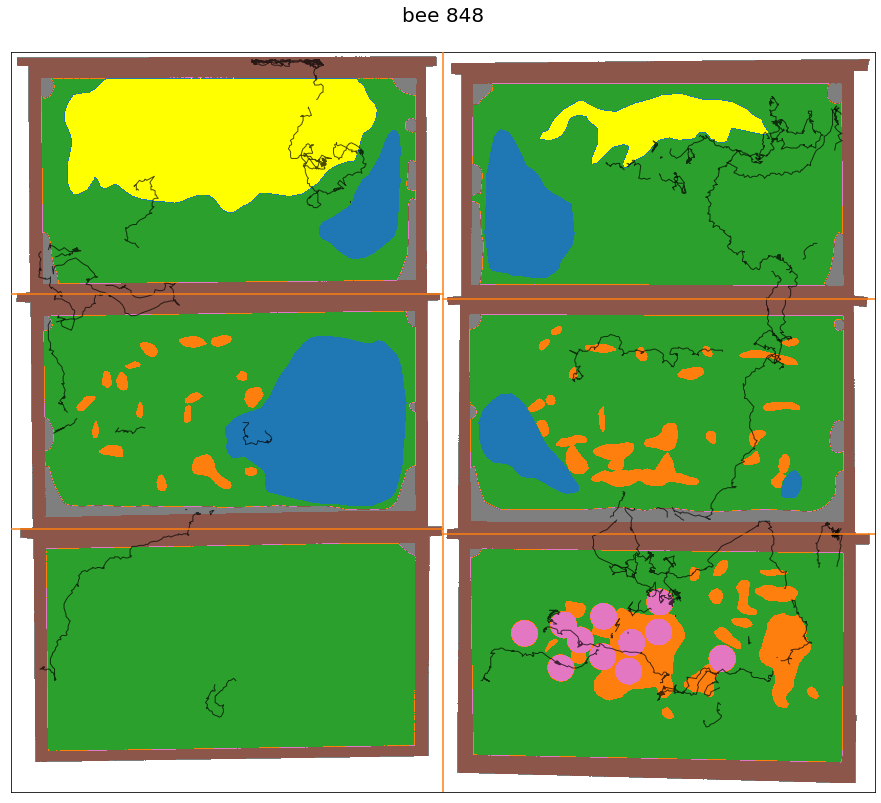

In [17]:
day_uids = np.unique(df['uid'])
bee_uid = day_uids[0]
dfsel = df[df['uid']==bee_uid]
ax = bp.showcomb(comb)
bp.plotbee_xy(dfsel['x'],dfsel['y'],dfsel['camera'],ax=ax)
bp.showframe(ax)
plt.suptitle('bee '+str(bee_uid),fontsize=20)
plt.show()